````{grid} 2
```{grid-item-card}
:class-header: bg-light
Voraussetzungen
^^^
- Grundlagen partieller Differentiation
- Implementierung eines Newton-Verfahrens (aus {ref}`newton_aufgaben`)
```
```{grid-item-card}
:class-header: bg-light
Lerninhalte
^^^
- Methode der kleinsten Quadrate (Curve Fitting)
- Anwendung des Newton-Verfahrens auf Curve-Fitting als ein Optimierungsproblem
```
````


(bierschaum)=
# Bierschaumzerfall

```{image} https://upload.wikimedia.org/wikipedia/commons/7/73/Weizenbier-ukko.jpg
:align: center
```
<div style="text-align: right"> Abbildung 1: "Weizenbier-ukko<a href="https://commons.wikimedia.org/wiki/User:Ukko.de" >Ukko.de</a>, <a href="https://creativecommons.org/licenses/by-sa/3.0" >[CC BY-SA 3.0]</a> via <a href="https://commons.wikimedia.org/wiki/File:Weizenbier-ukko.jpg" >Wikimedia Commons</a></div> <br>

Wenn wir ein Weizenbier länger stehen lassen, baut sich die schöne Schaumkrone ab. Aber wie schnell eigentlich?

## Experimenteller Aufbau

Messen wir es einfach nach! Wir benutzen einen Messbecher, Wasser und einen wasserfesten Marker, um ein Weizenglas mit Eichstrichen zu versehen *(Hier hätten wir natürlich auch direkt den Messbecher benutzen können, wir entscheiden uns aber, etwas Messgenauigkeit zu Gunsten der Realitätsnähe zu opfern)*. 

```{image} images/20190521_bierschaum_01.jpg
:width: 500px
:align: center
```
<div style=\"text-align: right\">Abbildung 2: Versuchsaufbau zur Messung des Bierschaumzerfalls.</div> <br>

Wir schütten ein Bier so in das geeichte Glas ein, dass sehr viel Schaum entsteht und notieren uns - so gut es eben geht - den unteren und oberen Stand des Schaumes zu unterschiedlichen Zeitpunkten. Die Differenz ist dann das Bierschaumvolumen zum jeweiligen Zeitpunkt.

```{image} images/20190521_bierschaum_02.jpg
:width: 500px
:align: center
```
```{image} images/20190521_bierschaum_03.jpg
:width: 500px
:align: center
```
<div style=\"text-align: right\">Abbildung 3: Protokollierte Messergebnisse.</div> <br>

| $t$ [s] | Oberer Messwert [$l$] | Unterer Messwert [$l$] | $V$ [$l$] |
| --  | --    | --    | --    |
|  11 | 0.600 | 0.025 | 0.575 |
|  18 | 0.590 | 0.045 | 0.545 |
|  21 | 0.580 | 0.050 | 0.530 |
|  27 | 0.570 | 0.075 | 0.495 |
|  32 | 0.570 | 0.085 | 0.485 |
|  37 | 0.570 | 0.100 | 0.470 |
|  52 | 0.570 | 0.125 | 0.445 |
|  96 | 0.555 | 0.150 | 0.400 |
| 149 | 0.510 | 0.175 | 0.335 |
| 195 | 0.480 | 0.180 | 0.300 |
| 246 | 0.430 | 0.190 | 0.240 |
| 301 | 0.400 | 0.195 | 0.205 |
| 362 | 0.370 | 0.199 | 0.171 |
| 430 | 0.350 | 0.200 | 0.150 |
| 482 | 0.340 | 0.201 | 0.139 |
| 541 | 0.300 | 0.205 | 0.095 |
| 601 | 0.270 | 0.208 | 0.062 |

Die Genauigkeit der Messung sei mal dahin gestellt, es reicht zumindest aus, um einen Trend zu erkennen: Der Schaum baut sich anfänglich schneller ab als später, wenn nicht mehr viel Schaum da ist. Wenn wir von einem Messfehler von ca. $2 \cdot 0.02 = 0.04$ Litern und ca. $1$ Sekunde ausgehen, ergibt sich folgendes Bild

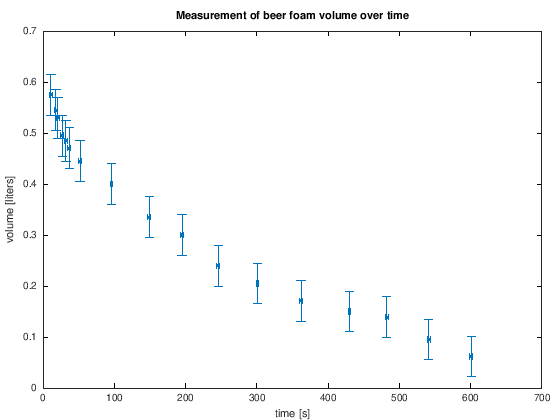

In [1]:
hold on

% plot measurement
% Note: The syntax of the errorbar function differs in Matlab, the next line only works with Octave. 
% Refer to the Matlab Documentation for more information.
h_meas = errorbar(t, V, t_err, V_err, '~>.');
title('Measurement of beer foam volume over time')
xlabel('time [s]')
ylabel('volume [liters]')

% plot model
a = -0.001;
b = 0.58;
tfine = linspace(t(1),t(end),100);
yfine = b*exp(a*tfine);
h_model = plot(tfine, yfine);

legend([h_meas, h_model],{'measurement data', 'model with guessed parameters'})

<div style=\"text-align: right\">Abbildung 4: Volumen in Litern über Zeit in Sekunden. Messungen mit Fehlerschätzung.</div> <br>

## Modellbeschreibung

Der Schaum besteht aus vielen kleinen Bläschen, die nach und nach platzen. Je mehr Schaum da ist, d.h. je mehr Bläschen da sind, desto mehr Bläschen platzen auch. Ist der Schaum schon fast komplett abgebaut, bleiben insgesamt weniger Bläschen die platzen können und die Zerfallsrate des Bierschaumes sinkt entsprechend. Mathematisch ausgedrückt ist die zeitliche Änderung $\dot{V}$ des Schaumvolumens proportional zur Menge des Schaumvolumens selbst, d.h. es gilt

$$ \dot{V} = a \cdot V, $$

mit einer uns unbekannten Proportionalitätskonstante $a \in \mathbb{R}$. Diese Differentialgleichung kommt sehr häufig vor, denn sie beschreibt exponentielles Wachstum, bzw. - je nach Vorzeichen von $a$ - exponentiellen Zerfall. Wir machen also, wie gewohnt, einen Ansatz 

$$ V(t) = b \cdot e^{c \cdot t}.$$

Setzen wir $V(t)$ in die Differentialgleichung $ \dot{V} = a \cdot V $ ein, 

$$ c b \cdot e^{c \cdot t} = a \cdot b e^{c \cdot t}, $$

stellen wir fest, dass unser Ansatz eine valide Lösung der Differentialgleichung ist, unter der Voraussetzung, dass $c = a$ gilt

$$ V(t) = b \cdot e^{a \cdot t}. $$

Ok, nun haben wir einerseits Messwerte und andererseits ein mathematisches Modell mit unbekannten Parametern $a$ und $b$. $b$ muss offensichtlich der y-Achsenabschnitt sein, da $V(0)=b \cdot e^0 = b$, den kennen wir aus den Messwerten. Aber was, wenn ausgerechnet die erste Messung mit Messfehlern behaftet ist? Abgesehen, davon haben wir auch dann noch Schwierigkeiten händisch die Zerfallsrate $a$ zu raten. Für $a=-0.001 \frac{1}{\text{s}}$ und $b=0.575$ $l$ ergibt sich folgender Verlauf.

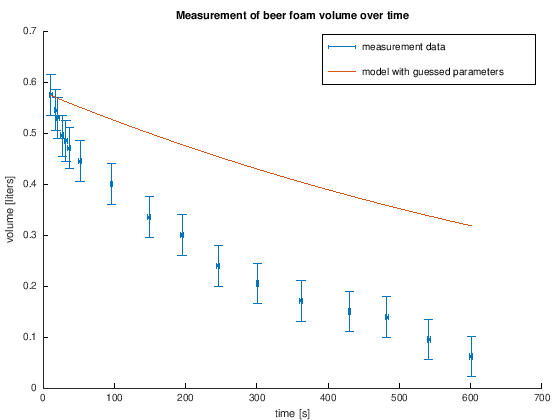

In [2]:
hold on

% plot measurement
% Note: The syntax of the errorbar function differs in Matlab, the next line only works with Octave. 
% Refer to the Matlab Documentation for more information.
h_meas = errorbar(t, V, t_err, V_err, '~>.');
title('Measurement of beer foam volume over time')
xlabel('time [s]')
ylabel('volume [liters]')

% plot model
a = -0.001;
b = 0.58;
tfine = linspace(t(1),t(end),100);
yfine = b*exp(a*tfine);
h_model = plot(tfine, yfine);

legend([h_meas, h_model],{'measurement data', 'model with guessed parameters'})

<div style=\"text-align: right\">Abbildung 5: Volumen in Litern über Zeit in Sekunden. Messungen mit Fehlerschätzung (blau) und Modell mit geratenen Parametern (orange).</div> <br>

Wir können immer noch keine quantifizierbare Aussage darüber treffen, wie schnell der Schaum sich abbaut. 
 
Wie können wir $a$ und $b$ so bestimmen, dass das Modell zu unseren Messwerten passt? Wenn wir das wüssten, könnten wir auf Grundlage der Modellgleichung Vorhersagen treffen.

## Die Methode der kleinsten Quadrate

Die Methode der kleinsten Quadrate ist eine weit verbreitete Methode zur Modellkalibrierung. Mit ihr können noch unbekannte Parameter $p_1,...,p_n$ eines Modells $y = f(p_1,...,p_n,t)$ so angepasst werden, dass es vorher ermittelte experimentelle Daten $(t_1,y_1),...,(t_m, y_m)$ möglichst gut wiederspiegelt.

### Die Grundidee

Wir formulieren ein Minimierungsproblem: Für alle Messpunkte $t_i$ soll die Differenz $y_i - f(p_1,...,p_n,t_i)$ betragsmäßig klein werden.

Für die Formulierung stehen verschiedene Ansätze zur Verfügung. Man könnte einfach den Mittelwert der betragsmäßigen Differenzen über alle Messpunkte minimieren:

$$ \min_{p_1,...,p_n} G(p_1,...,p_n) = \frac{1}{m} \sum_{i=1}^m |y_i - f(p_1,...,p_n,t_i)| . $$

Wenn die Funktion $G$ minimal werden soll, muss die Ableitung von $G$ nach allen Parametern verschwinden, 

$$ \frac{\partial G}{\partial p_1} = ... = \frac{\partial G}{\partial p_n} = 0. $$

Spätestens jetzt haben wir ein Problem: Wir müssen die Betragsfunktion, die in $G$ verwendet wird, ableiten. 

Als Alternative nehmen wir nicht den Betrag der Differenzen, sondern einfach das Quadrat. Auf diese Weise werden positive und negative Differenzen gleich berücksichtigt. Es hat auch noch den angenehmen Nebeneffekt, dass große Abweichungen zwischen Modell und Messung größer bestraft werden als kleine Abweichungen:

$$ \min_{p_1,...,p_n} G(p_1,...,p_n) = \frac{1}{m} \sum_{i=1}^m (y_i - f(p_1,...,p_n,t_i))^2 . $$

Das Minimierungsproblem lösen wir, indem wir die Bedingung aufstellen, dass alle Ableitungen von $G$ nach den Parametern null sein sollen und nach den Parametern auflösen. Die partiellen Ableitungen bestimmen wir mit der Kettenregel:

$$
\boldsymbol{0} = 
\begin{bmatrix}
0 \\ \vdots \\ 0
\end{bmatrix} = F(\mathbf{p}) =
\begin{bmatrix} 
\frac{\partial G}{\partial p_1}(p_1,...,p_n)  \\
\vdots \\
\frac{\partial G}{\partial p_n}(p_1,...,p_n)
\end{bmatrix}
=
\begin{bmatrix}
-\frac{2}{m}\sum_{i=1}^m (y_i - f(p_1,...,p_n,t_i))\cdot \frac{\partial f}{\partial p_1}(p_1,...,p_n) \\
\vdots \\
-\frac{2}{m}\sum_{i=1}^m (y_i - f(p_1,...,p_n,t_i))\cdot \frac{\partial f}{\partial p_n}(p_1,...,p_n) \\
\end{bmatrix}
$$

### Anwendung auf den Bierschaum

Im Falle des Bierschaumes gilt $p_1 = a, p_2 = b$ und

$$ f(a,b,t) = b\cdot e^{a \cdot t}. $$

Das nichtlineare Gleichungssystem, das gelöst werden muss lautet also

$$ 
\boldsymbol{0} = F(a,b) = 
\begin{bmatrix}
\frac{\partial G}{\partial a} (a,b) \\
\frac{\partial G}{\partial b} (a,b) 
\end{bmatrix} = 
\begin{bmatrix}
-\frac{2}{m}\sum_{i=1}^m (V_i - b \cdot e^{a \cdot t_i})\cdot  t_i \cdot b \cdot e^{a \cdot t_i} \\
-\frac{2}{m}\sum_{i=1}^m (V_i - b \cdot e^{a \cdot t_i}) \cdot e^{a \cdot t_i}
\end{bmatrix}.
$$

Im Folgenden wird das Problem schrittweise gelöst.
 1. Wir implementieren eine Matlab-Funktion, mit der wir $F$ auswerten können.
 2. Wir greifen auf unsere Implementierung des Newton-Verfahrens mit Auswertung der Jacobi-Matrix aus {ref}`newton_aufgaben` zurück. Damit können wir das Newton-Verfahren auf $F$ anwenden, um unsere Parameter zu bestimmen.
 3. Auf Basis unserer Funktion für das Newtonverfahren und unserer Funktion für die Jacobimatrix schreiben wir ein Programm zur Minimierung beliebiger skalarer Funktionen.

### Aufgabe 1: Das nichtlineare Gleichungssystem

Schreiben Sie eine Matlab-Funktion, die die nichtlineare Gleichung $F$ für beliebige Parameter $\mathbf{p}=[a,b]^T \in \mathbb{R}^2$ und Messwerte $t \in \mathbb{R}^m$, $V \in \mathbb{R}^m$ auswertet:

In [ ]:
%%file F.m
function e = F(p,t,V)
% define the nonlinear system of equations that need to be solved within the least squares fit
% of the beer froth experiment
%
% p = [a,b]' is a vector of the model parameters
%
% t and V are vectors containing the experimental data

% PUT YOUR CODE HERE

Damit haben Sie eine Funktion geschrieben, mit der Sie Ihr nichtlineares Gleichungssystem auswerten können. Damit alleine können Sie noch nicht so viel anfangen. In den folgenden beiden Aufgaben geht es nun darum, die Nullstellen dieser Funktion zu finden, um die beiden Parameter $a$ und $b$ bestimmen zu können.

(bierschaum_newton)=
### Aufgabe 2: Das Newton-Verfahren

Hier können wir unsere Implementierung des Newton-Verfahrens aus dem Kapitel {ref}`newton_aufgaben` zurückgreifen. Da unser Newton-Verfahren auf der Approximation der Jacobimatrix beruht, müssen wir diese zuerst implementieren. Kopieren Sie dazu Ihre Lösung aus dem Kapitel {ref}`newton_aufgaben` oder schreiben Sie eine Matlab-Funktion, die die Jacobimatrix $J_F(\mathbf{x})$ für eine beliebige Funktion $F:\mathbb{R}^n \to \mathbb{R}^m$ mit Differenzenquotienten (*"finiten Differenzen"*) approximiert. Dabei soll die Eingabe `F` ein *[Function Handle](https://de.mathworks.com/help/matlab/matlab_prog/creating-a-function-handle.html)* einer beliebigen Funktion sein, beispielsweise `@sin` oder `@(x) [x(1)^2; cos(x(2))]`.

In [ ]:
%%file jacobian.m
function J = jacobian(F,x)
% J = jacobian(F,x) returns the (m x n) Jacobian matrix of F evaluated at x
%
%   |  dF1/dx1 ... dF1/dxn |
%   |     .           .    |
%   |  dFm/dx1 ... dFm/dxn |
%
% It uses finite difference approximations. x must be a (n,1)-column vector and F must be a function
% taking an (n,1)-vector as an input. m is deduced from F.

% PUT YOUR CODE HERE

Wenn Sie Ihre Funktion richtig implementiert haben, sind Sie in der Lage mit folgendem Aufruf die Ableitung von $sin(x)$ an der Stelle $x=0.25$ auszuwerten:

In [ ]:
jacobian(@sin,0.25)

Mit dem folgenden Unit Test können Sie Ihre Funktion testen:

In [ ]:
moxunit_runtests test_jacobian.m

Mit Hilfe der `jacobian`-Funktion können Sie nun das Newton-Verfahren implementieren. Dazu können Sie auch hier entweder Ihre Lösung aus {ref}`newton_aufgaben` wiederverwenden oder eine neue Funktion implementieren.

In [ ]:
%%file newton.m
function z = newton(func,z0,tol,maxit)
% z = newton(F,z0,tol,maxit) solves the nonlinear system 0=func(z)
%
% inputs:
%   func    a handle to the nonlinear function
%   z0      initial guess for the Newton method
%   atol    absolute tolerance
%   maxit   maximum number of Newton iterations

% YOUR CODE HERE

Mit dem folgenden Unit Test können Sie Ihre Funktion testen:

In [ ]:
moxunit_runtests test_newton.m

 - Wenden Sie das Newton-Verfahren auf die Funkton `func = @(p) F(p,t,V)` an, um das ursprüngliche nichtlineare Gleichungssystem zu lösen. Wählen Sie angemessene Werte für die Toleranz und die maximale Anzahl an Iterationen. Wie lauten die Parameter $a$ und $b$ Ihrer Modellfunktion? 
 - Vergleichen Sie Ihr Ergebnis mit dem Ergebnis der Matlab-Funktion `fsolve`.
 - Erstellen Sie einen Plot mit den Messwerten, sowie der kalibrierten Modellfunktion $V(t) = b \cdot e^{a \cdot t}$.
 - Wie lautet die Halbwertzeit des Bierschaumes?

In [53]:
% SPACE FOR SOLUTION


## Optimierungsverfahren

Grundlage der Methode der kleinsten Quadrate ist ein Minimierungsproblem. Wir haben gesehen, dass sich das Minimum einer Funktion $G: \mathbb{R}^n \to \mathbb{R}$ bestimmen lässt, indem das nichtlineare Gleichungssystem 

$$
  \boldsymbol{0} = J_G(\mathbf{p})^T = 
  \begin{bmatrix}  
  \frac{\partial G}{\partial p_1}(\mathbf{p}) \\
  \vdots \\
  \frac{\partial G}{\partial p_n}(\mathbf{p})
  \end{bmatrix}
$$

mit dem Newton-Verfahren nach $\mathbf{p}$ gelöst wird. Die Iterationsvorschrift lautet

$$
\begin{align}
J_{J_G}(\mathbf{p}^{(i)}) \Delta \mathbf{p}^{(i+1)} &= - J_G(\mathbf{p}^{(i)})^T \notag \\
\mathbf{p}^{(i+1)} &= \mathbf{p}^{(i)} + \Delta \mathbf{p}^{(i)}, \notag
\end{align}
$$

$i=1,2,3,...$ Hierbei ist $J_G(\mathbf{p}^{(i)}) \in \mathbb{R}^n$ die Jacobimatrix von $G$. Die Jacobimatrix von $J_G(\mathbf{p}^{(i)})^T$ wiederum ist $J_{J_G}(\mathbf{p}^{(i)}) \in \mathbb{R}^{n \times n}$. Sie wird auch als *Hessematrix von $G$* an der Stelle $\mathbf{p}^{(i)}$ bezeichnet und beinhaltet die zweiten Ableitungen der Funktion $G$:

$$
Hess_G(\mathbf{p}) = J_{J_G}(\mathbf{p}) =
\begin{bmatrix}
\frac{\partial}{\partial p_0} \frac{\partial G}{\partial p_0}(\mathbf{p}) & \cdots & \frac{\partial}{\partial p_n} \frac{\partial G}{\partial p_0}(\mathbf{p}) \\
\vdots & \ddots & \vdots \\
\frac{\partial}{\partial p_0} \frac{\partial G}{\partial p_n}(\mathbf{p}) & \cdots & \frac{\partial}{\partial p_n} \frac{\partial G}{\partial p_n}(\mathbf{p})
\end{bmatrix}.
$$

Zusammenfassend kann ein Minimierungsproblem also gelöst werden, indem es auf ein nichtlineares Gleichungssystem zurückgeführt wird. Dieses wiederum kann mit Hilfe des Newtonverfahren gelöst werden. In jeder Iteration des Newtonverfahrens muss ein lineares Gleichungssystem gelöst werden.

### Aufgabe 3: Algorithmus zur Minimierung einer Funktion

Schreiben Sie eine neue Funktion `minimize(func,x0,tol,maxit)` auf Grundlage Ihrer Implementierung für das Newtonverfahren, die eine beliebige Funktion `func`$: \mathbb{R}^n \to \mathbb{R}$ minimiert. Verwenden Sie Ihre Funktion `jacobian`, um die Hessematrix sowie die rechte Seite in jedem Funktionsaufruf zu konstruieren.

 - Lösen Sie das ursprüngliche Minimierungsproblem
 
   $$ \min_{p_1,...,p_n} G(p_1,...,p_n) = \frac{1}{m} \sum_{i=1}^m (y_i - f(p_1,...,p_n,t_i))^2  $$
 
 mit Ihrer neuen Funktion und vergleichen Sie das Ergebnis mit Ihrem Ergebnis aus Aufgabe 3 sowie dem Resultat der Matlab-Funktion `fminsearch`.
 - Wo sind die Grenzen Ihres Algorithmus? Gibt es mögliche Fehlerquellen, die Nutzer Ihrer Funktion beachten sollten?

In [ ]:
%%file minimize.m

%SPACE FOR SOLUTION

```{admonition} Hinweis
Wenn Sie Ihr Ergebnis aus Aufgaben 2 und 3 wiederverwenden, können Sie die Funktion mit nur 1-2 Zeilen implementieren. Vermeiden Sie duplizierten Code!
```

In [55]:
% SPACE FOR SCRIPT SOLUTION


### Zusätzliche Informationen

Zusätzliche Informationen zum Verfall von Bierschaum finden Sie in {cite}`Theissen2009, Leike2001`.

## Literatur

```{bibliography}
:filter: docname in docnames
```